In [154]:
from functools import reduce
import pandas as pd
import numpy as np
import itertools as itr
import math
import siuba
from siuba import _, mutate
import plotnine
from plotnine import aes, ggplot, geom_point
from siuba.data import cars, cars_sql

In [155]:
seed = 1335
n = 50
rn_g = np.random.default_rng(seed)
x = rn_g.normal(loc=0.0, scale =1, size =n)
y = x + rn_g.normal(loc=0.0,scale = 1, size =n)

In [156]:
df = pd.DataFrame({'x':x, 'y':y})
df=(
df >>
    mutate(z= _.x + _.y) >>
    mutate(up = _.x > _.y)
)
df.head()

,x,y,z,up
0,-0.863825,-2.278823,-3.142648,True
1,-0.042430,-0.576620,-0.619050,True
2,-0.298208,-0.657312,-0.955519,True
3,0.577730,0.402440,0.980170,True
4,0.493105,-0.340730,0.152376,True


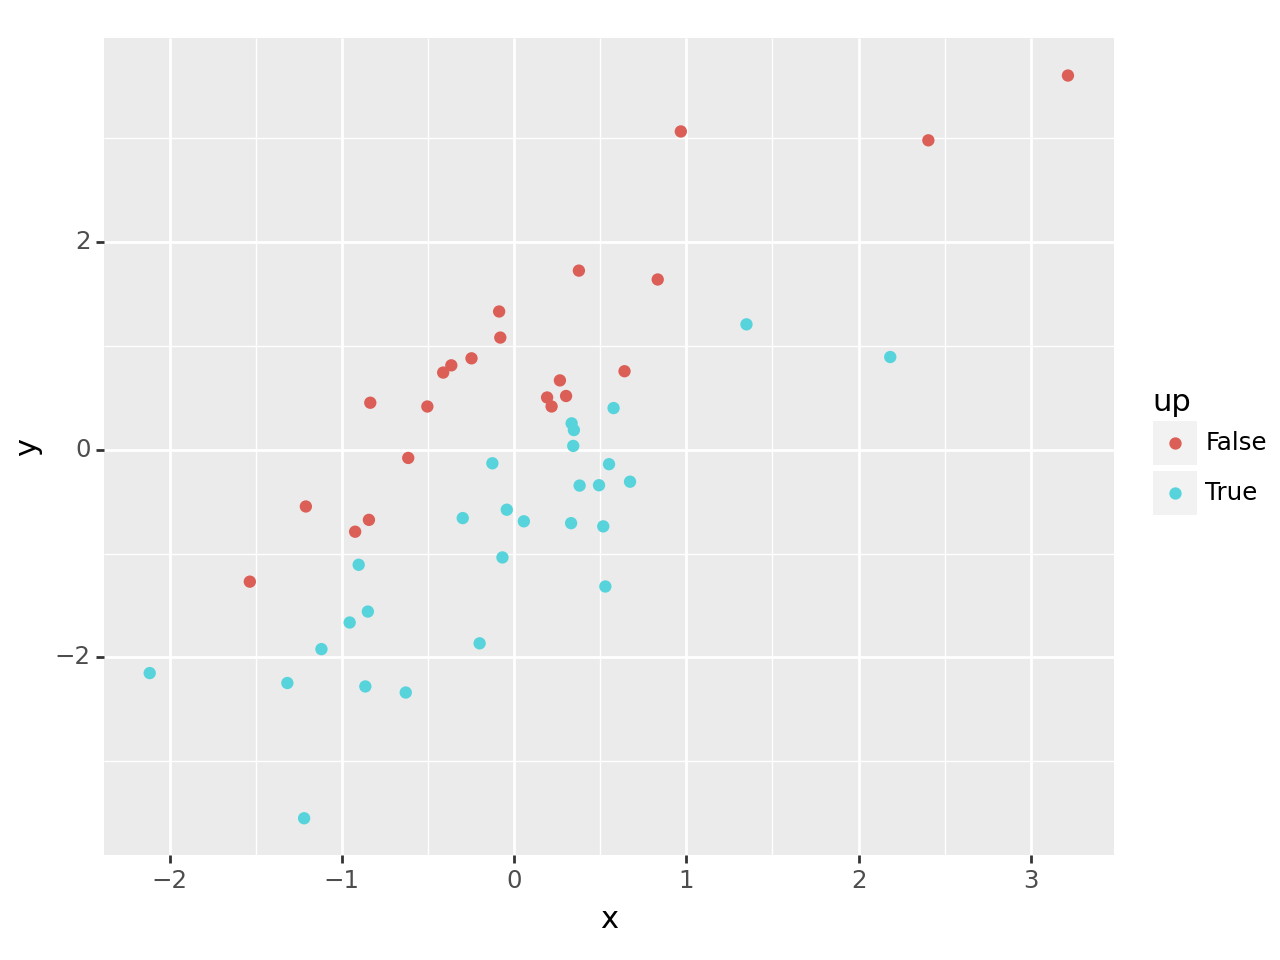

<Figure Size: (640 x 480)>

In [157]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() 
)

In [158]:
cars.head()

,cyl,mpg,hp
0,6,21.0,110
1,6,21.0,110
2,4,22.8,93
3,6,21.4,110
4,8,18.7,175


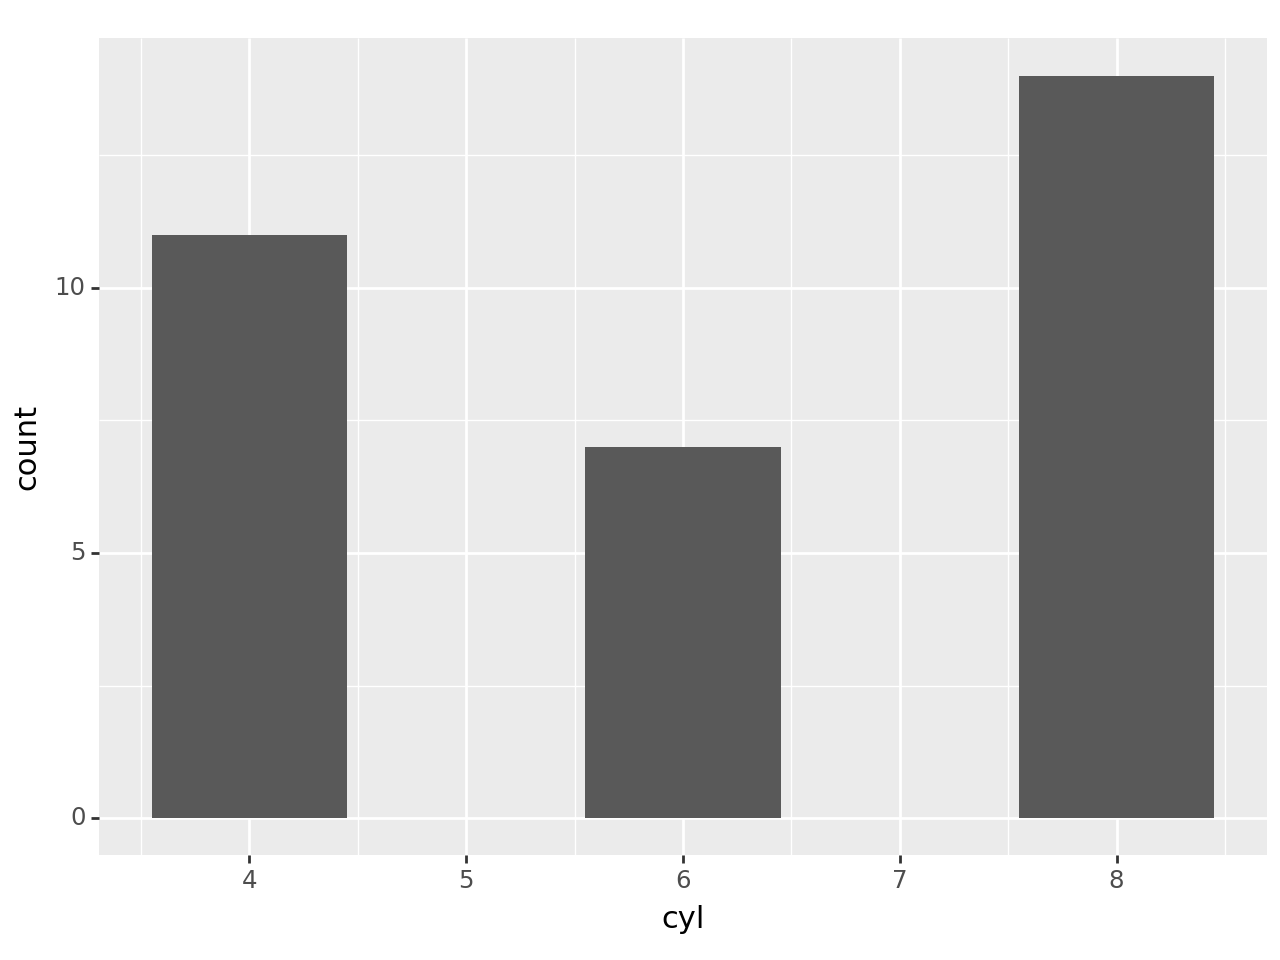

<Figure Size: (640 x 480)>

In [165]:
(
cars >>
    plotnine.ggplot(aes(x ='cyl',color='cyl')) +
    plotnine.geom_bar()
)

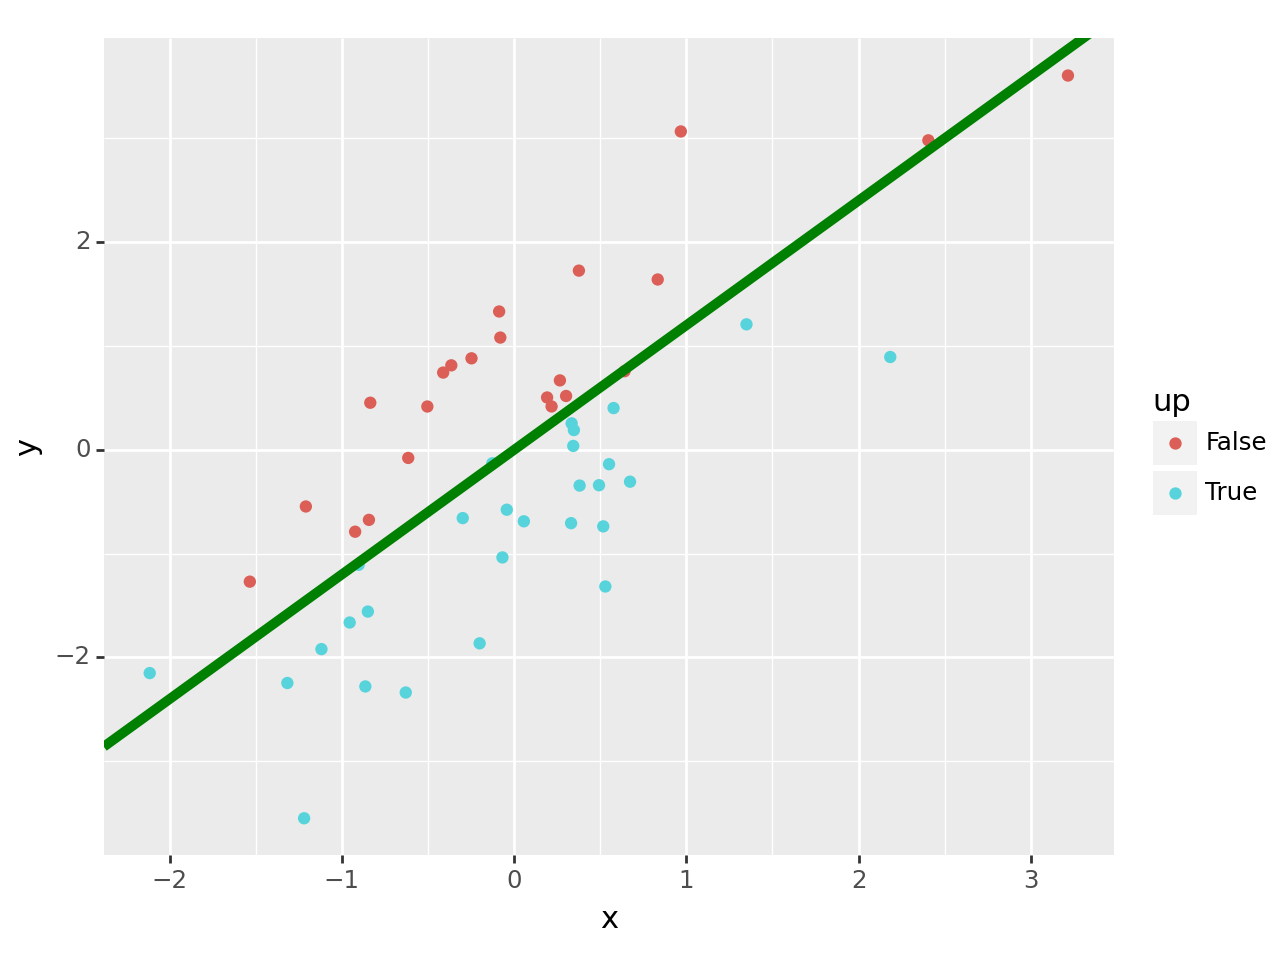

<Figure Size: (640 x 480)>

In [179]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() +
    plotnine.geom_abline(aes(intercept=0, slope=1.2),color='green',size=2)
)

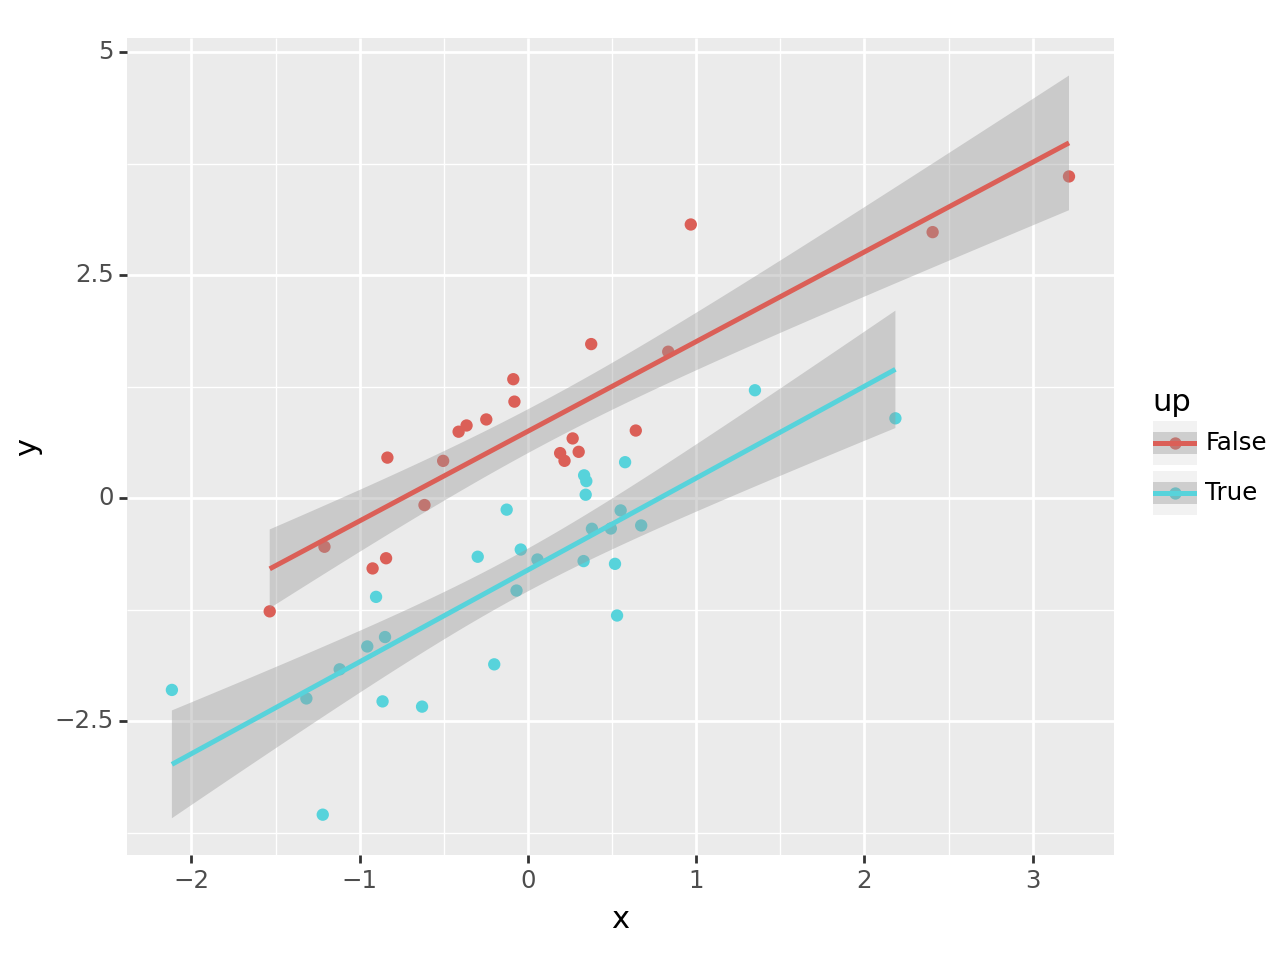

<Figure Size: (640 x 480)>

In [182]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() +
    # plotnine.geom_abline(aes(intercept=0, slope=1.2),color='green',size=2)
    plotnine.geom_smooth(method='lm')
)

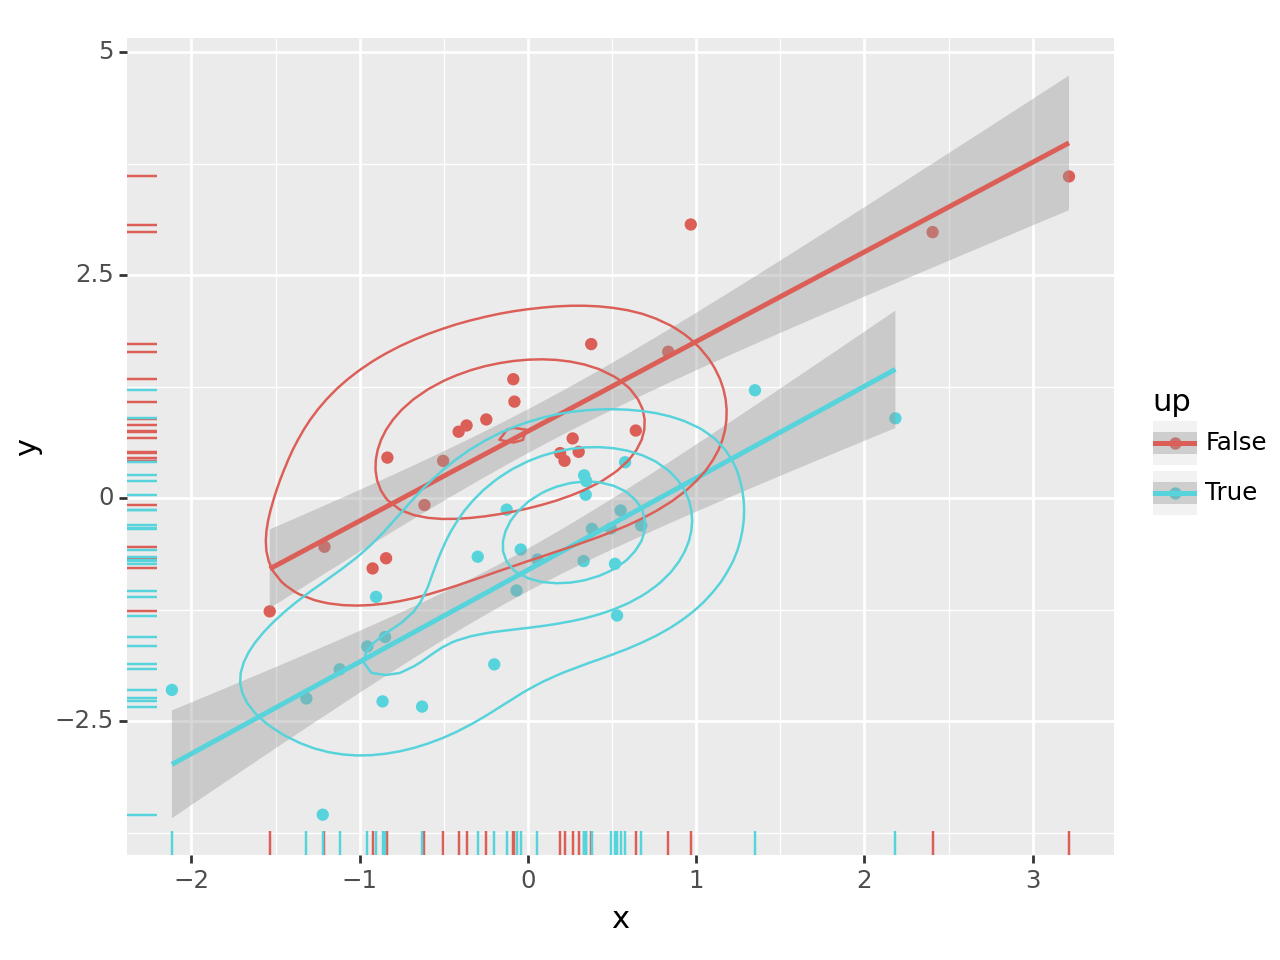

<Figure Size: (640 x 480)>

In [236]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() +
    # plotnine.geom_abline(aes(intercept=0, slope=1.2),color='green',size=2)
    plotnine.geom_smooth(method='lm')+
    plotnine.geom_rug() +
    plotnine.geom_density_2d()
)

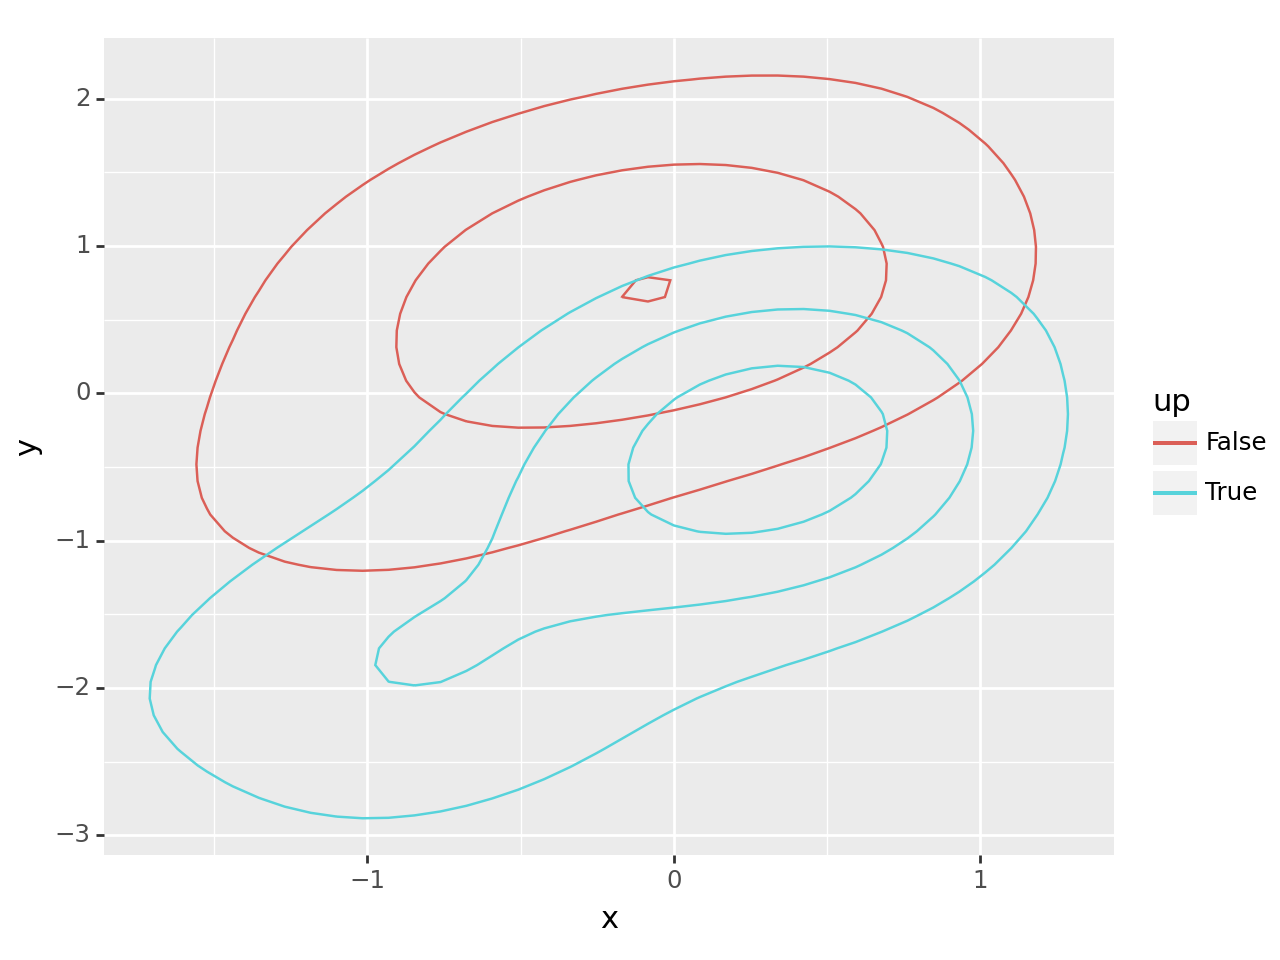

<Figure Size: (640 x 480)>

In [235]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up'))+
    plotnine.geom_density_2d()
)

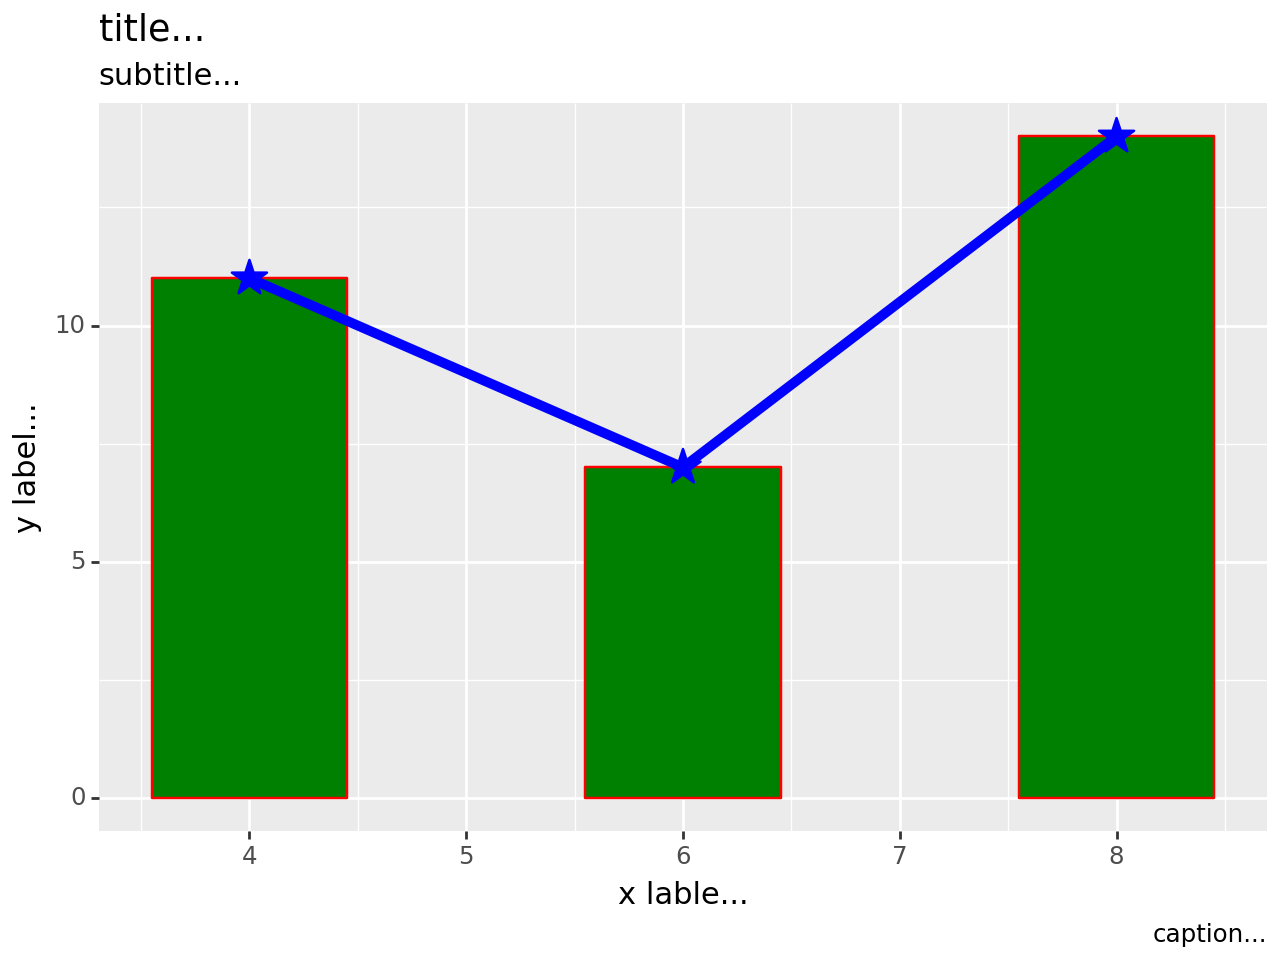

<Figure Size: (640 x 480)>

In [227]:
(
cars >>
    siuba.count('cyl') >>
    ggplot(aes(x='cyl', y='n'))+
    plotnine.geom_col(color='red', fill='green')+
    plotnine.geom_point(color='blue', size=7,shape='*')+
    plotnine.geom_line(color='blue', size=2)+
    plotnine.labs(title='title...',subtitle='subtitle...',caption='caption...', x='x lable...', y= 'y label...')
)

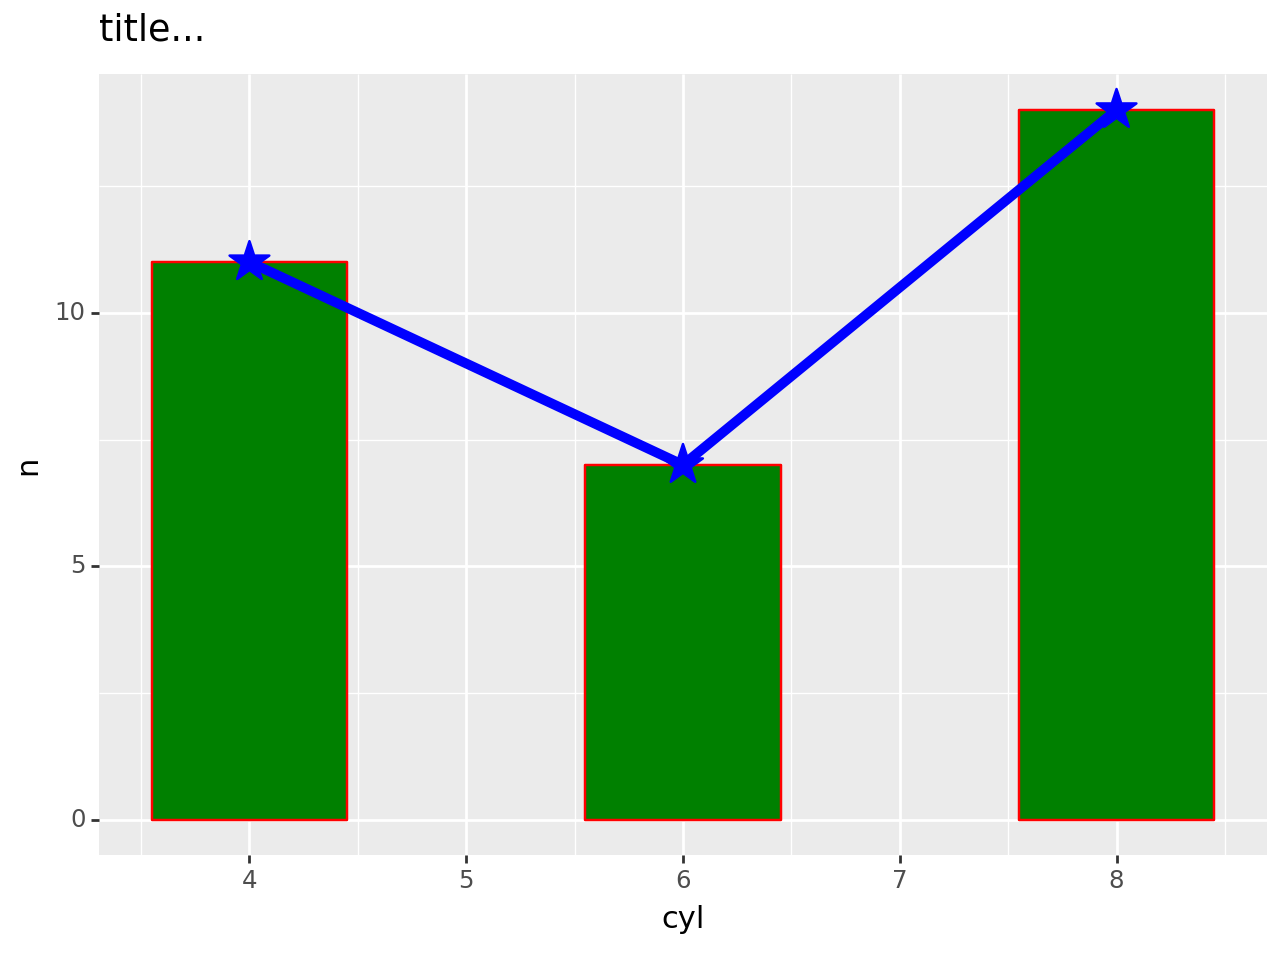

<Figure Size: (640 x 480)>

In [224]:
(
cars  >>
    siuba.count('cyl') >>
    plotnine.ggplot(aes('cyl','n')) +
    plotnine.geom_col(color='red', fill='green')+
    plotnine.geom_point(shape='*',color='blue',size=8)+
    plotnine.geom_line(color='blue',size=2) 

)

In [233]:
help(plotnine.geom_smooth)

Help on class geom_smooth in module plotnine.geoms.geom_smooth:

class geom_smooth(plotnine.geoms.geom.geom)
 |  geom_smooth(mapping: 'Aes | None' = None, data: 'DataLike | None' = None, **kwargs: 'Any')
 |  
 |  A smoothed conditional mean
 |  
 |  
 |  .. rubric:: Usage
 |  
 |  ::
 |  
 |      geom_smooth(mapping=None, data=None, stat='smooth', position='identity',
 |                  na_rm=False, inherit_aes=True, show_legend=None, raster=False,
 |                  legend_fill_ratio=0.5, **kwargs)
 |  
 |  Only the ``data`` and ``mapping`` can be positional, the rest must
 |  be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
 |  used by the ``stat``.
 |  
 |  
 |  Parameters
 |  ----------
 |  mapping : aes, optional
 |      Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inherit.aes=True`, it is combined with the default mapping for the plot. You must supply mapping if there is no plot mapping.
 |      
 |      =============== ======